In [1]:
from pyexpat import features

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
print(iris.data)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
X = iris.data
Y = iris.target

In [6]:
X[0:50,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

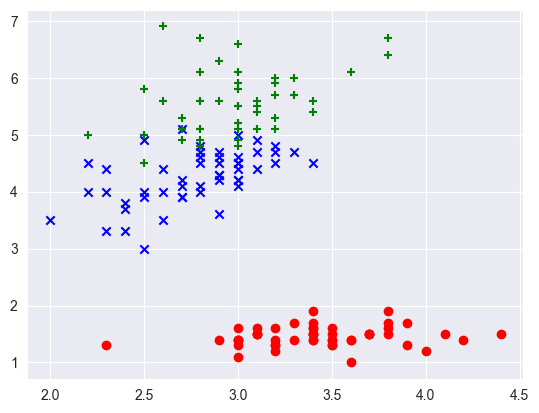

In [7]:
features=1
features_others = 2
plt.scatter(X[0:50,features],X[0:50,features_others],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,features],X[50:100,features_others],color='blue',marker='x',label='versicolor')
plt.scatter(X[100:150,features],X[100:150,features_others],color='green',marker='+',label='virginica')

In [8]:
model = linear_model.LogisticRegression(C = 1e5)
model.fit(X,Y)

LogisticRegression(C=100000.0)

In [9]:
print(model.coef_)
print(model.intercept_)
print(model.score(X,Y))

[[  7.65468113  20.37791608 -29.73624532 -13.92223192]
 [ -2.5978061   -6.85211729  10.15852722  -2.146586  ]
 [ -5.05687503 -13.52579879  19.5777181   16.06881792]]
[  4.01263282  19.25739234 -23.27002516]
0.9866666666666667


# 可视化分类结果
使用两个特征进行训练

In [10]:
features = 2
features_others = 3
X = iris.data
Y = iris.target
X_2 = X[:, [features, features_others]]

In [11]:
model2 = linear_model.LogisticRegression(C = 1e5)
model2.fit(X_2,Y)

LogisticRegression(C=100000.0)

In [13]:
h = 0.02
x_min, x_max = X_2[:,0].min() - 1, X_2[:,0].max() + 1
y_min, y_max = X_2[:,1].min() - 1, X_2[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#生成网格
xx,yy

(array([[0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        ...,
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88]]),
 array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
        [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
        [-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
        ...,
        [ 3.44,  3.44,  3.44, ...,  3.44,  3.44,  3.44],
        [ 3.46,  3.46,  3.46, ...,  3.46,  3.46,  3.46],
        [ 3.48,  3.48,  3.48, ...,  3.48,  3.48,  3.48]]))

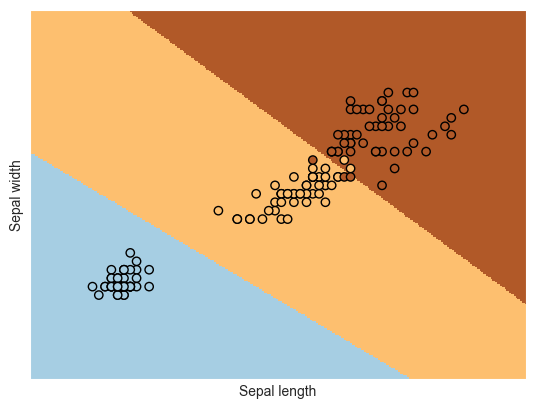

In [17]:
np.c = np.c_[xx.ravel(), yy.ravel()]
Z = model2.predict(np.c)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)
plt.scatter(X_2[:,0], X_2[:,1], c = Y, edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()